In [1]:
%reload_ext autoreload
%autoreload 2

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from asa.projection_methods import get_LDA_projection
from asa.dataset import Dataset

In [10]:
s1 = np.random.multivariate_normal([0, 0, 0], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
                                  100)
s2 = np.random.multivariate_normal([1, 1, 1], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
                                  100)
s3 = np.random.multivariate_normal([-1, -1, -1],
                                  [[1, 0, 0], [0, 1, 0], [0, 0, 1]], 100)

In [11]:
dataset = Dataset(np.c_[np.vstack([s1, s2, s3]),
                        np.repeat([0, 1, 2], 100)], ['x', 'y', 'z', 's'],
                  ['x_label', 'y_label', 'z_label', 's'])

In [12]:
axis_string, projector = dataset.get_LDA_projection(['x', 'y', 'z'], 's', 2)
axis_string

['0.65 x_label + 0.62 y_label + 0.52 z_label',
 '-0.34 x_label - 0.37 y_label + 0.79 z_label']

In [13]:
X_proj = projector(dataset.get_data_by_names(['x', 'y', 'z']))

Text(0, 0.5, '-0.34 x_label - 0.37 y_label + 0.79 z_label')

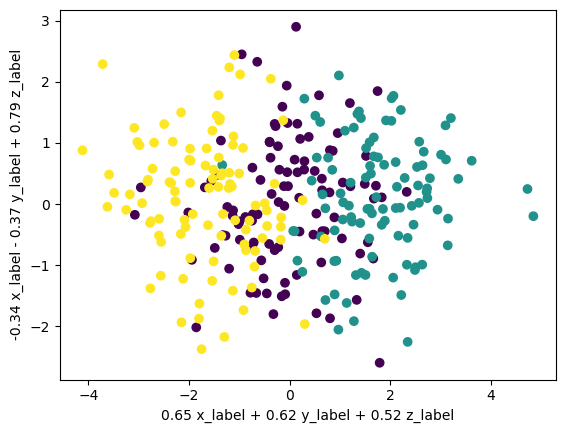

In [14]:
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=dataset.get_data_by_name('s'))
plt.xlabel(axis_string[0])
plt.ylabel(axis_string[1])

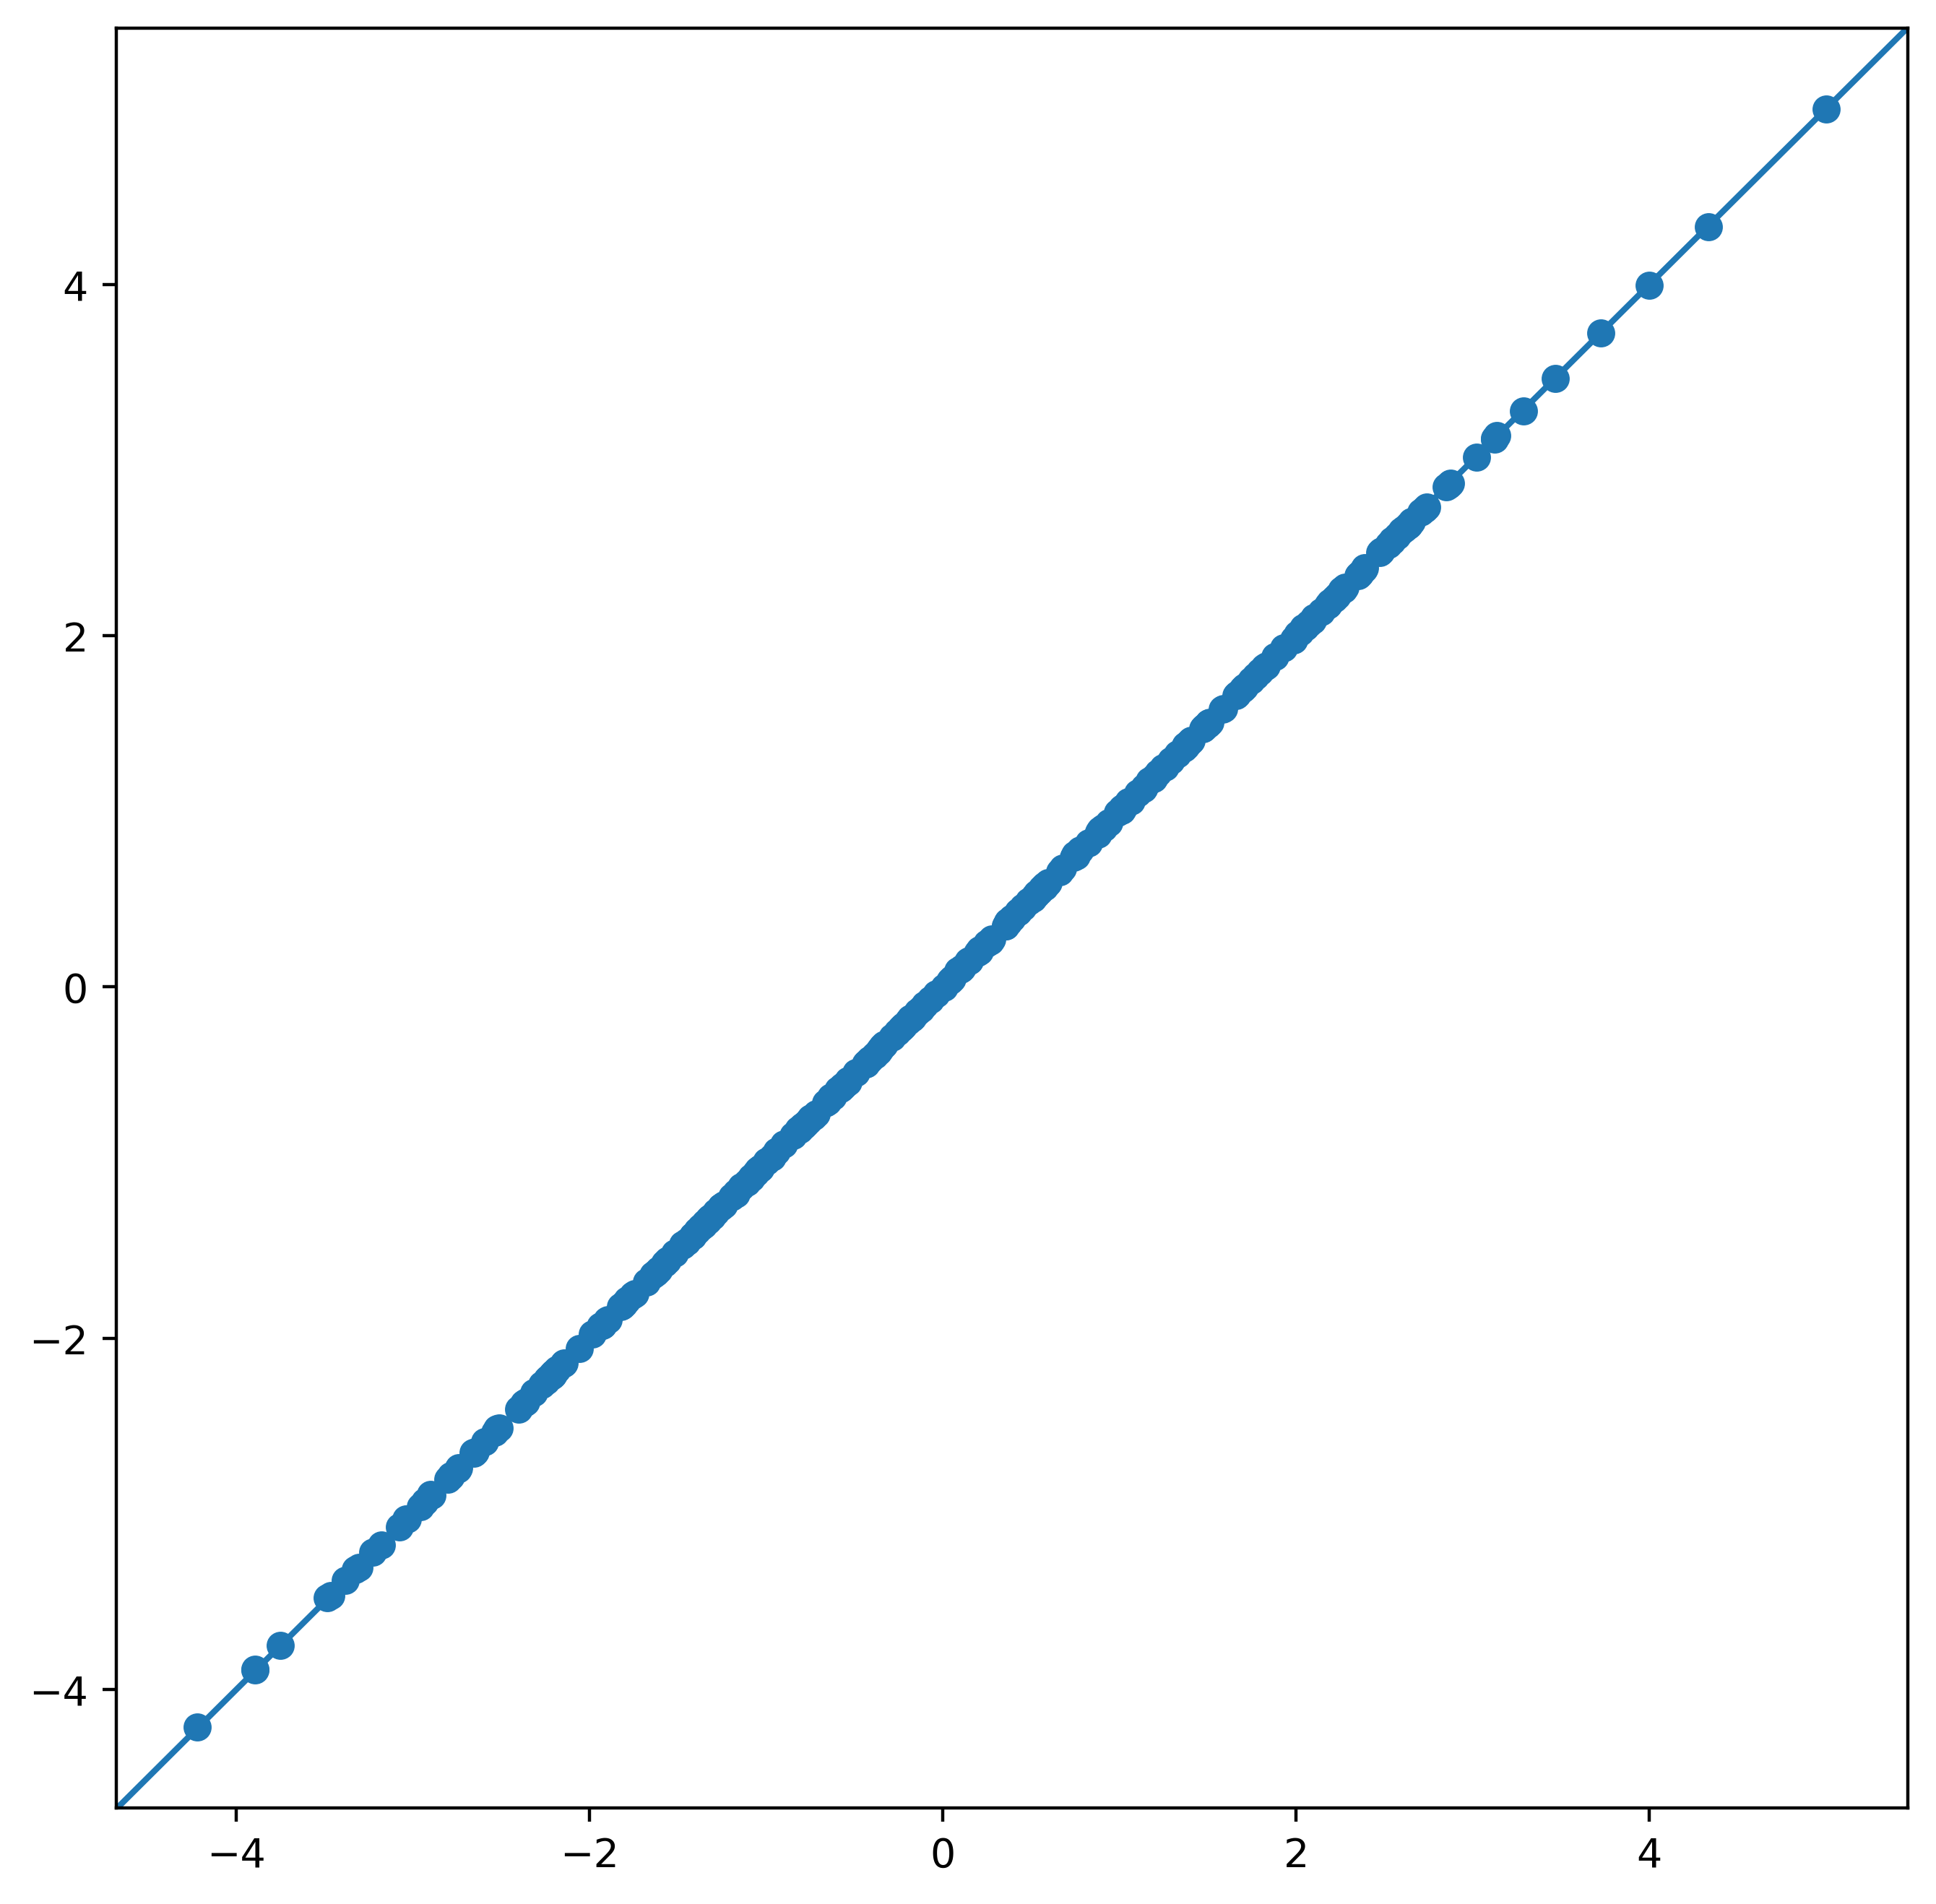

In [41]:
plt.figure(figsize=(8, 8), dpi=400)
x_axis = 0.56 * dataset['x'] + 0.56 * dataset['y'] + 0.67 * dataset['z']
plt.scatter(x_axis, X_proj[:, 0])
plt.axline([0, 0], [1, 1])